# 기계학습 과제
### 주제 : fashion_mnist 데이터를 사용해서 accuracy를 제일 높게 얻기
- 기존 실습에서 했던 것을 기반으로 직접 모델을 자유롭게 구현
- 하이퍼파라메터는 자유롭게 변동 가능
- data augmentation 가능 
  - 한다면 왜 그렇게 적용했는지, 어떤 영향이 있는지 설명
- 최종 accuracy을 출력하고, 학습곡선 그래프 그리기  
- 코드를 돌리고 결과물이 다 남아있도록 저장 후 본 ipynb 파일(파일>다운로드>.ipynb 다운로드) 과  pdf 파일(파일>인쇄>pdf로 저장) 제출


### 학번 : 201814471
### 이름 : 서지희
### 제출일 : 2021-06-17

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype(np.float32)/255.0
X_test = X_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test,10)

n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

In [3]:
mlp = Sequential()
mlp.add(Dense(units=n_hidden1, activation='tanh', input_shape=(n_input,),kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))


In [4]:
# 신경망 학습
mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_test, y_test),verbose=2)

# 학습된 신경망으로 예측
res = mlp.evaluate(X_test, y_test, verbose=0)
print('accuracy = ',res[1]*100)

Epoch 1/30
469/469 - 6s - loss: 0.0351 - accuracy: 0.8092 - val_loss: 0.0263 - val_accuracy: 0.8340
Epoch 2/30
469/469 - 5s - loss: 0.0235 - accuracy: 0.8562 - val_loss: 0.0234 - val_accuracy: 0.8542
Epoch 3/30
469/469 - 5s - loss: 0.0212 - accuracy: 0.8679 - val_loss: 0.0222 - val_accuracy: 0.8570
Epoch 4/30
469/469 - 5s - loss: 0.0199 - accuracy: 0.8746 - val_loss: 0.0232 - val_accuracy: 0.8494
Epoch 5/30
469/469 - 5s - loss: 0.0187 - accuracy: 0.8814 - val_loss: 0.0208 - val_accuracy: 0.8646
Epoch 6/30
469/469 - 5s - loss: 0.0179 - accuracy: 0.8872 - val_loss: 0.0205 - val_accuracy: 0.8654
Epoch 7/30
469/469 - 5s - loss: 0.0174 - accuracy: 0.8892 - val_loss: 0.0216 - val_accuracy: 0.8651
Epoch 8/30
469/469 - 5s - loss: 0.0170 - accuracy: 0.8931 - val_loss: 0.0189 - val_accuracy: 0.8787
Epoch 9/30
469/469 - 5s - loss: 0.0164 - accuracy: 0.8970 - val_loss: 0.0198 - val_accuracy: 0.8732
Epoch 10/30
469/469 - 5s - loss: 0.0159 - accuracy: 0.9003 - val_loss: 0.0196 - val_accuracy: 0.8761

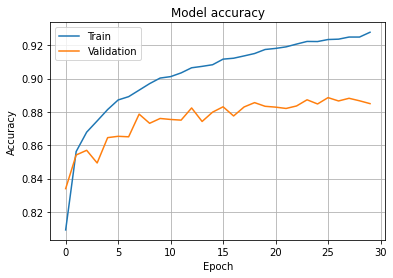

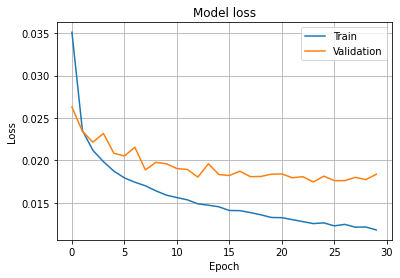

In [5]:
import matplotlib.pyplot as plt

# accuracy 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.grid()
plt.show()


